### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head(10)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS', ], axis=1, inplace=True)

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_types = application_df['APPLICATION_TYPE'].value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

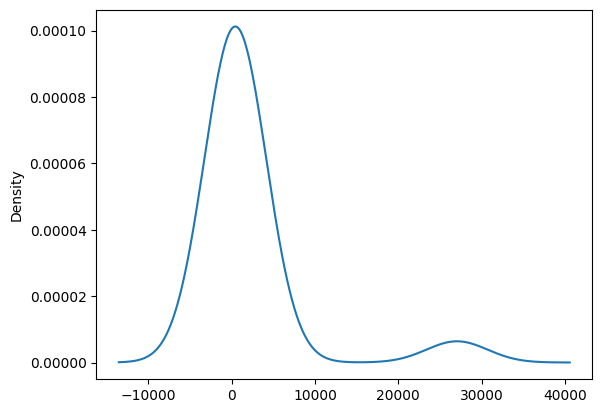

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_types.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_types[application_types < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_values = application_df['CLASSIFICATION'].value_counts()
classification_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

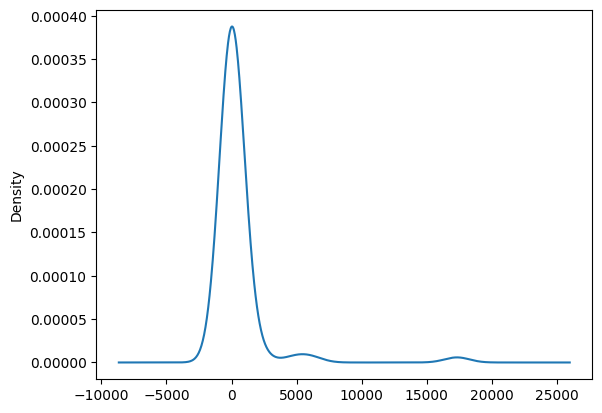

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_values.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_values[classification_values < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encoder_df = pd.DataFrame(enc.fit_transform(application_df[application_category]))

# Add the encoded variable names to the dataframe
encoder_df.columns = enc.get_feature_names_out(application_category)
encoder_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encoder_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_category)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-16-8ec224c6782f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 10
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                672       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 853
Trainable params: 853
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
#saves every 5 minutes
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

In [20]:
# Train the model
fit_mod = nn.fit(
    X_train, y_train, epochs=50, validation_split=0.2
)

Epoch 1/50
644/644 [==============================] - 9s 6ms/step - loss: 15478.1768 - accuracy: 0.4818 - val_loss: 26627.7070 - val_accuracy: 0.5310
Epoch 2/50
644/644 [==============================] - 1s 2ms/step - loss: 5417.5752 - accuracy: 0.5064 - val_loss: 18171.5664 - val_accuracy: 0.5310
Epoch 3/50
644/644 [==============================] - 1s 2ms/step - loss: 43782.0625 - accuracy: 0.5147 - val_loss: 7378.1802 - val_accuracy: 0.4690
Epoch 4/50
644/644 [==============================] - 1s 2ms/step - loss: 25288.9062 - accuracy: 0.5265 - val_loss: 12789.2500 - val_accuracy: 0.5310
Epoch 5/50
644/644 [==============================] - 1s 2ms/step - loss: 27344.5078 - accuracy: 0.5200 - val_loss: 12996.0156 - val_accuracy: 0.4690
Epoch 6/50
644/644 [==============================] - 2s 3ms/step - loss: 2277.2378 - accuracy: 0.5154 - val_loss: 2001.6869 - val_accuracy: 0.4690
Epoch 7/50
644/644 [==============================] - 2s 3ms/step - loss: 15443.3516 - accuracy: 0.5139 

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7186 - accuracy: 0.6959 - 338ms/epoch - 1ms/step
Loss: 0.7185619473457336, Accuracy: 0.6958600878715515


In [22]:
# Add more layers to improve the accuracy score
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 16
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                840       
                                                                 
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,193
Trainable params: 1,193
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_mod = nn.fit(
    X_train, y_train, epochs=50, validation_split=0.2
)

Epoch 1/50
644/644 [==============================] - 3s 3ms/step - loss: 27995.1309 - accuracy: 0.4960 - val_loss: 102916.4062 - val_accuracy: 0.5310
Epoch 2/50
644/644 [==============================] - 2s 3ms/step - loss: 47557.3789 - accuracy: 0.5070 - val_loss: 43274.4922 - val_accuracy: 0.5310
Epoch 3/50
644/644 [==============================] - 2s 2ms/step - loss: 13911.6064 - accuracy: 0.4965 - val_loss: 23.9129 - val_accuracy: 0.5699
Epoch 4/50
644/644 [==============================] - 2s 2ms/step - loss: 29394.7031 - accuracy: 0.4903 - val_loss: 228.2330 - val_accuracy: 0.5236
Epoch 5/50
644/644 [==============================] - 2s 2ms/step - loss: 31700.2930 - accuracy: 0.4993 - val_loss: 23070.8750 - val_accuracy: 0.4690
Epoch 6/50
644/644 [==============================] - 1s 2ms/step - loss: 18334.4922 - accuracy: 0.5082 - val_loss: 6341.0967 - val_accuracy: 0.4690
Epoch 7/50
644/644 [==============================] - 2s 3ms/step - loss: 6949.6470 - accuracy: 0.5112 - 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.8630 - accuracy: 0.6992 - 531ms/epoch - 2ms/step
Loss: 0.8629931807518005, Accuracy: 0.6992419958114624


In [27]:
nn.save('AlphabetSoupCharity-opt1.h5')

<Axes: >

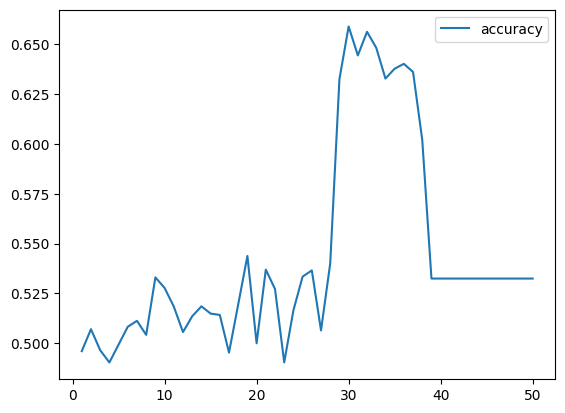

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<Axes: >

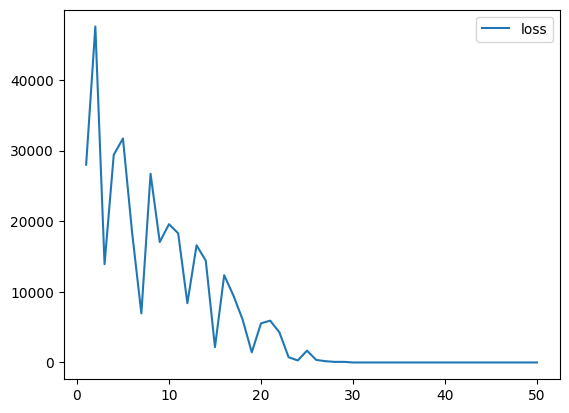

In [29]:
history_df.plot(y="loss")